In [54]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import string
#Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF,LatentDirichletAllocation;
from sklearn.preprocessing import normalize;

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


Using SKLearn, I will run all times article text through TFIDF and then NMF for topic analysis. CountVectorizer-->LDA was also attempted, but I had better topics via NMF

In [55]:
df = pd.read_pickle("nyt_final")
df = df.reset_index(drop=True)
nyt_text = df[['full_text','_id']]

nyt_text.iloc[25]
documents = nyt_text.full_text.values.tolist()
documents[25]

'He expressed bewilderment that anyone would think he had done wrong. He defended his skills as a part-time business consultant, even suggesting to the prosecutors sitting nearby that they could benefit from his services. He scoffed at the notion that he had entered office to enrich himself.\n\n“I can say to you honestly, as honestly as I can: In my heart, and in my mind, I did nothing wrong,” Mr. Bruno told Judge Gary L. Sharpe of United States District Court. “I didn’t have to go into politics,” he said. “I had a job. I had a business.”\n\nBut Judge Sharpe disagreed, sternly reminding Mr. Bruno that he had been convicted by a jury of his peers and that punishment was required.\n\n“You committed a crime,” the judge said. “The jury told you that. You can’t accept it. You have blinders on. You simply can’t see it.”\n\nIn addition to the prison sentence, Judge Sharpe ordered Mr. Bruno to pay $280,000 in restitution and to serve three years’ probation.\n\nProsecutors had asked that Mr. Br

In [56]:
df.sample()

,_id,abstract,headline_clean,keywords,new_desk,print_page,pub_date,clean_pubdate,year,month,section_name,snippet,source,type_of_material,web_url,word_count,full_text,summary,author
14,5452d5c338f0d81b603ed212,NaN,Judge Gives State Senators Weekend to Negotiate,"[chamber, senates, senate, democrats, york, week, judge, resolve, gives, power, dispute, weekend, republicans, mr, state, democratic, senators]",Metro,NaN,2009-06-13T00:00:00Z,2009-06-13T00:00:00+00:00,2009,6,NaN,A justice in State Supreme Court expressed reluctance to intervene in the New York State Senate dispute.,The New York Times,News,https://www.nytimes.com/2009/06/13/nyregion/13albany.html,712,"As lawyers for both sides prepared for another round of legal sparring, Senate Democrats were planning to meet Friday afternoon in Manhattan to discuss how they can move forward after a devastating week. Support within the Democratic conference for its current leader, Malcolm A. Smith of Queens, has been eroding since the Republicans displaced the party from power on Monday.\n\nDuring their meeting, senators are expected to discuss whether to remove Mr. Smith and install someone else. Support for Senator John L. Sampson of Brooklyn as leader has been building in recent days, according to some Democrats. But other senators, including Jeffrey D. Klein of the Bronx, are said to be interested in the position, said some Democrats, who spoke anonymously to discuss private internal talks.\n\nBy comparison, Friday was a sedate day in the Capitol after pandemonium reigned for most of the week.\n\nNewsletter Sign Up Continue reading the main story Please verify you're not a robot by clicking the box. Invalid email address. Please re-enter. You must select a newsletter to subscribe to. Sign Up You will receive emails containing news content , updates and promotions from The New York Times. You may opt-out at any time. You agree to receive occasional updates and special offers for The New York Times's products and services. Thank you for subscribing. An error has occurred. Please try again later. View all New York Times newsletters.\n\nOn Thursday, Republicans used a mysterious set of keys to force their way into the Senate chamber for the first time since their leadership coup on Monday. Protesters chanted “Senate not for sale” and banged on the chamber’s windows while Republicans tried to convene. And the Republicans’ vow to resume the session fizzled after one of the two dissident Democrats they were depending on for a quorum, Hiram Monserrate of Queens, walked out of the chamber shortly after the proceedings began.\n\n“The dysfunction and chaos in the Senate has wasted an entire week of the people’s business,” a clearly irritated Gov. David A. Paterson said in a statement released Thursday. He has been largely relegated to the sidelines during the dispute.\n\nBy day’s end, it was clear that the balance of power in the state’s upper house — and the very gears of state government — continued to rest in the hands of Mr. Monserrate, who was indicted in March on charges of slashing his female companion with a broken glass.\n\nAs he was leaving the Senate chamber, a Republican staff member dashed after him, pleading, “Senator, we need you back in there.” But Mr. Monserrate said he was committed to recruiting more Democrats to join the coalition and would be holding meetings all day in hopes of doing so, even as those Democrats were simultaneously trying to woo him back to their side.\n\n“This chamber must not remain divided,” he said. “You can’t have coalition government with 2 Democrats and 30 Republicans.”\n\nThere were many other developments throughout the day.\n\nThe Senate’s new president, Pedro Espada Jr., a Bronx Democrat sharing power with Republicans, tried to lure his former Democratic colleagues back to the chamber by offering to bring same-sex marriage legislation to the Senate floor next week, for the first time in the Senate’s history.\n\nAdvertisement Continue reading th

In [57]:
newsletters = '''Newsletter Sign Up Continue reading the main story 
Please verify you're not a robot by clicking the box. Invalid email address. 
Please re-enter. You must select a newsletter to subscribe to. 
Sign Up You will receive emails containing news content , updates and promotions from The New York Times. 
You may opt-out at any time. You agree to receive occasional updates and special offers for 
The New York Times's products and services. Thank you for subscribing. 
An error has occurred. Please try again later. View all New York Times newsletters.
'''

documents = [re.sub(newsletters,"", text) for text in documents]
print("*") #stars are just printed so I can watch this run through and see how much time it takes, roughly
documents = [re.sub("\[|\]", " ", text) for text in documents]
print("*")
documents = [re.sub("\\b[a-z]{1,2}\\b","", text) for text in documents]
print("**")
documents = [re.sub("\d+","", text) for text in documents]
print("***")
#Remove Punctuation
to_remove = string.punctuation
table = str.maketrans("", "", to_remove)
documents = [text.translate(table)\
                             for text in documents]
print("****")

*
*
**
***
****


In [58]:
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,1))
dtm_tfidf = tfidf.fit_transform(documents)

In [59]:
lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=20,
             perp_tol=0.1, random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [60]:
# nmf_model = NMF(n_components=20)
# doc_vectors_nmf = nmf_model.fit_transform(doc_vectors)

In [61]:
# pyLDAvis.enable_notebook()
# pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf,mds='tsne')


In [62]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(["said","times","memorials","facebook","newsletter"\
                                            ,"updates","sign","receive","continue","mr","main"\
                                           ,"reading" ,"story","reading","time","services","later","view"\
                                           ,"try","occurred","promotions","containing","offers","newsletters"\
                                            ,"invalid", "products", "address","select"])

In [63]:
tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2),max_df=0.9)
tfidf.fit(documents)
dtm_tfidf = tfidf.transform(documents)

In [64]:
nmf_model = NMF(n_components=20, random_state=0)
nmf_model.fit(dtm_tfidf)
dtm_nmf = nmf_model.transform(dtm_tfidf)

In [65]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print_top_words(nmf_model,tfidf.get_feature_names(),10)

Topic #0: budget tax state billion year taxes new york york million cuts
Topic #1: news feed feed page friends important share memories memorial application page app honor departed application helps
Topic #2: york boys migrant children boys appear appear migrant arrive new children arrive migrant boys arrive appear
Topic #3: marriage samesex samesex marriage gay vote rights republican senator couples new york
Topic #4: bruno abbruzzese court indictment consulting prosecutors federal business payments wright
Topic #5: ny kormann doughty albany ny medicine meineker psychiatry college medical degree
Topic #6: monserrate senate espada democrats republicans senator smith democratic majority senators
Topic #7: authority tolls plan transportation ravitch transit transportation authority fare smith mta
Topic #8: gillibrand ms ms gillibrand kennedy ms kennedy schumer race paladino percent clinton
Topic #9: schools mayor city blasio bloomberg charter school charter schools teachers education
Top

In [66]:
def dict_topic_words(model, feature_names, n_top_words):
    topic_dict={}
    for topic_idx, topic in enumerate(model.components_):
#         message = "Topic #%d: " % topic_idx
        message = ""
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
#         print(message)
        topic_dict[topic_idx]=message
#     print()
    return topic_dict


dict_topwords = dict_topic_words(nmf_model,tfidf.get_feature_names(),5)

In [67]:
# now let's transform our documents to topic-space
print(f"shape before transforming to topic space: {dtm_tfidf.shape}")

# doc_topics = lda.transform(counts)

print(f"shape after transforming to topic space: {dtm_nmf.shape}") #838 lines, 20 topics

shape before transforming to topic space: (864, 153566)
shape after transforming to topic space: (864, 20)


In [68]:
type(dtm_nmf)
doc_max_top = np.argmax(dtm_nmf, axis=1 )
doc_max_top.shape

(864,)

In [69]:
headlines = list(df['headline_clean'])
doc_topics = pd.DataFrame(dtm_nmf)
doc_topics.index = headlines
doc_topics.head()
# doc_topics.sort_values(by=11,ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Bill Banning Gov. Cuomo From Taking Appointee Donations Clears Senate,0.000000,0.000000,0.001056,0.008354,0.000000,0.000000,0.00000,0.058539,0.000000,0.0,0.000000,0.000000,0.000308,0.002696,0.0,0.0,0.030035,0.041987,0.000000,0.000000
NY Senate OKs Bill That Would Fix Spelling in Bridge's Name,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Details of Counts Against Ex-Senate Leader,0.008827,0.000043,0.002447,0.000000,0.305910,0.001072,0.00000,0.000052,0.000000,0.0,0.001416,0.000032,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
"In Closing Arguments, Bruno as Bully or Honest Worker",0.005751,0.001649,0.000635,0.000000,0.214609,0.000000,0.00000,0.000000,0.000000,0.0,0.003610,0.000000,0.002313,0.000000,0.0,0.0,0.036796,0.000000,0.000000,0.000000
Whistling Past the Deficit,0.106456,0.002607,0.000000,0.000139,0.000236,0.000000,0.00739,0.000000,0.000127,0.0,0.002825,0.000000,0.010248,0.000000,0.0,0.0,0.003579,0.001583,0.000621,0.002585


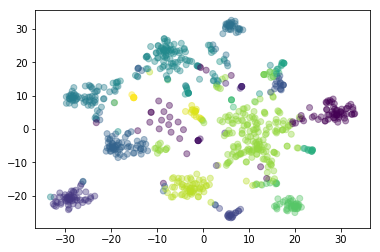

In [70]:
### t-SNE:
from sklearn.manifold import TSNE
import sklearn.cluster as cluster
import seaborn as sns

# tsne = TSNE(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0,metric='cosine')
#Project the data in 2D
doc_plot = tsne.fit_transform(doc_topics)
# data=
# clustering = cluster.KMeans(n_clusters=15)
# clusters = clustering.fit_predict(doc_topics)

# clustering = cluster.AgglomerativeClustering(n_clusters=20)
# clusters = clustering.fit_predict(doc_topics)

# data = pd.DataFrame()
# data['x']=X_2d.T[0]
# data['y']=X_2d.T[1]
# data['clusters']=list(clusters)

# facet = sns.lmplot(data=data, x='x', y='y', hue='clusters', 
#                    fit_reg=False, legend=True
#                    , legend_out=True, size=12, aspect=1)
plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_top, alpha=.4)
plt.savefig("tsne_clusters")

In [71]:
doc_topics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Bill Banning Gov. Cuomo From Taking Appointee Donations Clears Senate,0.000000,0.000000,0.001056,0.008354,0.000000,0.000000,0.000000,0.058539,0.000000,0.000000,0.000000,0.000000,0.000308,0.002696,0.000000,0.000000,0.030035,0.041987,0.000000,0.000000
NY Senate OKs Bill That Would Fix Spelling in Bridge's Name,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Details of Counts Against Ex-Senate Leader,0.008827,0.000043,0.002447,0.000000,0.305910,0.001072,0.000000,0.000052,0.000000,0.000000,0.001416,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"In Closing Arguments, Bruno as Bully or Honest Worker",0.005751,0.001649,0.000635,0.000000,0.214609,0.000000,0.000000,0.000000,0.000000,0.000000,0.003610,0.000000,0.002313,0.000000,0.000000,0.000000,0.036796,0.000000,0.000000,0.000000
Whistling Past the Deficit,0.106456,0.002607,0.000000,0.000139,0.000236,0.000000,0.007390,0.000000,0.000127,0.000000,0.002825,0.000000,0.010248,0.000000,0.000000,0.000000,0.003579,0.001583,0.000621,0.002585
"For Bruno, Politics and Business Intersected on the Golf Course",0.000354,0.000924,0.000000,0.002946,0.244607,0.005936,0.000000,0.005412,0.003237,0.008920,0.000000,0.001701,0.001424,0.003456,0.000000,0.005096,0.000000,0.000000,0.000135,0.000000
Jump-Start the New York Senate,0.003120,0.000000,0.002668,0.005436,0.000000,0.000000,0.143635,0.001932,0.006916,0.003041,0.000500,0.003985,0.000764,0.000000,0.005926,0.000000,0.074009,0.000000,0.004574,0.000000
Blame Panic in G.O.P. for Standoff in Albany,0.016686,0.000000,0.001698,0.006952,0.000000,0.000000,0.178081,0.002954,0.007151,0.000000,0.000000,0.000000,0.001233,0.000000,0.008042,0.000000,0.007100,0.000000,0.000000,0.000000
Monserrate’s Flip Creates Tie in New York Senate,0.000000,0.003795,0.000876,0.002199,0.000645,0.000000,0.299093,0.000000,0.000000,0.000000,0.002372,0.000000,0.000000,0.000000,0.012617,0.000000,0.000000,0.000000,0.000000,0.006733
Justice on the Farm,0.000000,0.010438,0.001748,0.008454,0.000000,0.003558,0.099402,0.000000,0.000000,0.000000,0.000021,0.000000,0.000746,0.004202,0.001150,0.001062,0.010144,0.000000,0.014133,0.011418


In [72]:
doc_max_pd = pd.Series(doc_max_top)
doc_max_pd.value_counts()

16    190
9     112
0     88 
6     76 
8     67 
17    65 
3     57 
14    49 
7     34 
4     20 
5     18 
18    16 
15    13 
10    12 
12    11 
11    11 
2     7  
19    7  
1     6  
13    5  
dtype: int64

In [73]:
print_top_words(nmf_model,tfidf.get_feature_names(),5)

Topic #0: budget tax state billion year
Topic #1: news feed feed page friends important
Topic #2: york boys migrant children boys appear appear migrant arrive new
Topic #3: marriage samesex samesex marriage gay vote
Topic #4: bruno abbruzzese court indictment consulting
Topic #5: ny kormann doughty albany ny medicine
Topic #6: monserrate senate espada democrats republicans
Topic #7: authority tolls plan transportation ravitch
Topic #8: gillibrand ms ms gillibrand kennedy ms kennedy
Topic #9: schools mayor city blasio bloomberg
Topic #10: york today today morning new york york
Topic #11: st ave goodman fifth ave goodman fund
Topic #12: banks derivatives trading financial ackerman
Topic #13: mann lebair paxton mann karen deceased
Topic #14: skelos son corruption adam charges
Topic #15: sacred heart sacred heart society sacred mcnabb
Topic #16: state new york york commission ethics
Topic #17: cuomo governor state andrew andrew cuomo
Topic #18: minimum wage minimum wage hour wage hour
Topi

In [74]:
pd.DataFrame(dtm_nmf)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.001056,0.008354,0.000000,0.000000,0.000000,0.058539,0.000000,0.000000,0.000000,0.000000,0.000308,0.002696,0.000000,0.000000,0.030035,0.041987,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.008827,0.000043,0.002447,0.000000,0.305910,0.001072,0.000000,0.000052,0.000000,0.000000,0.001416,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.005751,0.001649,0.000635,0.000000,0.214609,0.000000,0.000000,0.000000,0.000000,0.000000,0.003610,0.000000,0.002313,0.000000,0.000000,0.000000,0.036796,0.000000,0.000000,0.000000
4,0.106456,0.002607,0.000000,0.000139,0.000236,0.000000,0.007390,0.000000,0.000127,0.000000,0.002825,0.000000,0.010248,0.000000,0.000000,0.000000,0.003579,0.001583,0.000621,0.002585
5,0.000354,0.000924,0.000000,0.002946,0.244607,0.005936,0.000000,0.005412,0.003237,0.008920,0.000000,0.001701,0.001424,0.003456,0.000000,0.005096,0.000000,0.000000,0.000135,0.000000
6,0.003120,0.000000,0.002668,0.005436,0.000000,0.000000,0.143635,0.001932,0.006916,0.003041,0.000500,0.003985,0.000764,0.000000,0.005926,0.000000,0.074009,0.000000,0.004574,0.000000
7,0.016686,0.000000,0.001698,0.006952,0.000000,0.000000,0.178081,0.002954,0.007151,0.000000,0.000000,0.000000,0.001233,0.000000,0.008042,0.000000,0.007100,0.000000,0.000000,0.000000
8,0.000000,0.003795,0.000876,0.002199,0.000645,0.000000,0.299093,0.000000,0.000000,0.000000,0.002372,0.000000,0.000000,0.000000,0.012617,0.000000,0.000000,0.000000,0.000000,0.006733
9,0.000000,0.010438,0.001748,0.008454,0.000000,0.003558,0.099402,0.000000,0.000000,0.000000,0.000021,0.000000,0.000746,0.004202,0.001150,0.001062,0.010144,0.000000,0.014133,0.011418


In [75]:
doc_max = pd.DataFrame(doc_max_top)

doc_max.columns=['topic_max']
doc_max.sample(2)

,topic_max
817,16
567,14


In [76]:
print(len(doc_max))
print(len(df))

864
864


In [77]:
print(doc_max.iloc[2]) # topic 3 = 3: bruno abbruzzese court indictment consulting so that's perfect
print("*"*50)
df.iloc[2]

topic_max    4
Name: 2, dtype: int64
**************************************************


_id                 4fd2a4b98eb7c8105d88b855                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# Topic #0: budget tax state billion year
# Topic #1: news feed feed page friends important
# Topic #2: york boys migrant children boys appear appear migrant arrive new
# Topic #3: marriage samesex samesex marriage gay vote
# Topic #4: bruno abbruzzese court indictment consulting
# Topic #5: ny kormann doughty albany ny medicine
# Topic #6: monserrate senate espada democrats republicans
# Topic #7: authority tolls plan transportation ravitch
# Topic #8: gillibrand ms ms gillibrand kennedy ms kennedy
# Topic #9: schools mayor city blasio bloomberg
# Topic #10: york today today morning new york york
# Topic #11: st ave goodman fifth ave goodman fund
# Topic #12: banks derivatives trading financial ackerman
# Topic #13: mann lebair paxton mann karen deceased
# Topic #14: skelos son corruption adam charges
# Topic #15: sacred heart sacred heart society sacred mcnabb
# Topic #16: state new york york commission ethics
# Topic #17: cuomo governor state andrew andrew cuomo
# Topic #18: minimum wage minimum wage hour wage hour
# Topic #19: koch snyder ms snyder morgenthau ms

In [78]:
topic_desc_mapper = {0: "budget, taxes" ,
1: "misc social media advertising" ,
2: "immigration",
3: "same-sex marriage",
4: "Senator Bruno corruption case",
5: "misc",
6: "Infighting - Espada/Monserrate",
7: "MTA, Transit",
8: "NY US Senators",
9: "NYC Schools",
10: "misc",
11: "NYC General",
12: "Financial Regulations",
13: "misc, death announcements",
14: "Dean Skelos corruption case",
15: "misc, death announcements",
16: "ethics commission, ethics",
17: "Governor Cuomo, Governorship",
18: "minimum wage",
19: "NYC Leaders vs. Albany"}

In [79]:
nyt_master_alltopics = df.merge(pd.DataFrame(dtm_nmf),left_index=True,right_index=True)
nyt_master_alltopics = nyt_master_alltopics.merge(doc_max,left_index=True,right_index=True)
nyt_master_alltopics= nyt_master_alltopics.rename(topic_desc_mapper,axis='columns')
nyt_master_alltopics.sample().T

,763
_id,57d0496695d0e021d7984dc2
abstract,NaN
headline_clean,"Clinton, Schumer Eye New Political Partnership in 2017"
keywords,[]
new_desk,NaN
print_page,NaN
pub_date,2016-09-07T17:04:29Z
clean_pubdate,2016-09-07T17:04:29+00:00
year,2016
month,9


In [80]:
nyt_master = df.merge(doc_max,left_index=True,right_index=True)
# nyt_master.rename({"0":"topic_max"},inplace=True)
nyt_master.sample()

,_id,abstract,headline_clean,keywords,new_desk,print_page,pub_date,clean_pubdate,year,month,section_name,snippet,source,type_of_material,web_url,word_count,full_text,summary,author,topic_max
592,550fdd2138f0d82e80e0acf7,NaN,Poll Finds Little Support for Cuomo’s Policy on Purging State Emails,"[voters, emails, support, purging, policy, cuomo, little, email, state, finds, purges, cuomos, mr, groups, poll, stop]",Metro,,2015-03-24T00:00:00Z,2015-03-24T00:00:00+00:00,2015,3,NaN,"Eighty percent of New York State voters said emails should be kept for longer than 90 days, echoing watchdog groups and lawmakers who have criticized the rule.",The New York Times,News,https://www.nytimes.com/2015/03/24/nyregion/poll-finds-little-support-for-cuomos-policy-on-purging-state-emails.html,396,"New York State voters overwhelmingly disagree with the Cuomo administration’s policy of automatically deleting state workers’ emails after 90 days, according to a poll released Monday.\n\nEighty percent of voters said emails should be saved for a significantly longer period of time, according to the poll, which was conducted by Siena College. Only 16 percent supported the speedy email purges.\n\nIn Albany, the email policy has drawn loud criticism in recent weeks from government watchdog groups as well as some lawmakers, who have proposed legislation to stop the email purges. The policy has also reinforced Gov. Andrew M. Cuomo’s reputation for seeking to tightly control information, a defining trait of his administration.\n\nUnder increasing pressure, Mr. Cuomo, a Democrat, suggested this month that he would consider adopting a new policy, but only if the Legislature agreed to provide the public with greater access to its records. Last week, skeptical of the governor’s intentions, groups that advocate government transparency urged Mr. Cuomo to put an immediate stop to the email purges.","New York State voters overwhelmingly disagree with the Cuomo administration’s policy of automatically deleting state workers’ emails after 90 days, according to a poll released Monday.\nEighty percent of voters said emails should be saved for a significantly longer period of time, according to the poll, which was conducted by Siena College.\nOnly 16 percent supported the speedy email purges.\nIn Albany, the email policy has drawn loud criticism in recent weeks from government watchdog groups as well as some lawmakers, who have proposed legislation to stop the email purges.\nLast week, skeptical of the governor’s intentions, groups that advocate government transparency urged Mr. Cuomo to put an immediate stop to the email purges.",THOMAS KAPLAN,17


In [81]:
'''
Topic #0: budget tax state billion year
Topic #1: news feed feed page friends important
Topic #2: york boys migrant children boys appear appear migrant arrive new
Topic #3: marriage samesex samesex marriage gay vote
Topic #4: bruno abbruzzese court indictment consulting
Topic #5: ny kormann doughty albany ny medicine
Topic #6: monserrate senate espada democrats republicans
Topic #7: authority tolls plan transportation ravitch
Topic #8: gillibrand ms ms gillibrand kennedy ms kennedy
Topic #9: schools mayor city blasio bloomberg
Topic #10: york today today morning new york york
Topic #11: st ave goodman fifth ave goodman fund
Topic #12: banks derivatives trading financial ackerman
Topic #13: mann lebair paxton mann karen deceased
Topic #14: skelos son corruption adam charges
Topic #15: sacred heart sacred heart society sacred mcnabb
Topic #16: state new york york commission ethics
Topic #17: cuomo governor state andrew andrew cuomo
Topic #18: minimum wage minimum wage hour wage hour
Topic #19: koch snyder ms snyder morgenthau ms

'''

'\nTopic #0: budget tax state billion year\nTopic #1: news feed feed page friends important\nTopic #2: york boys migrant children boys appear appear migrant arrive new\nTopic #3: marriage samesex samesex marriage gay vote\nTopic #4: bruno abbruzzese court indictment consulting\nTopic #5: ny kormann doughty albany ny medicine\nTopic #6: monserrate senate espada democrats republicans\nTopic #7: authority tolls plan transportation ravitch\nTopic #8: gillibrand ms ms gillibrand kennedy ms kennedy\nTopic #9: schools mayor city blasio bloomberg\nTopic #10: york today today morning new york york\nTopic #11: st ave goodman fifth ave goodman fund\nTopic #12: banks derivatives trading financial ackerman\nTopic #13: mann lebair paxton mann karen deceased\nTopic #14: skelos son corruption adam charges\nTopic #15: sacred heart sacred heart society sacred mcnabb\nTopic #16: state new york york commission ethics\nTopic #17: cuomo governor state andrew andrew cuomo\nTopic #18: minimum wage minimum wag

In [82]:
topic_desc_mapper = {0: "budget, taxes" ,
1: "misc social media advertising" ,
2: "immigration",
3: "same-sex marriage",
4: "Senator Bruno corruption case",
5: "misc",
6: "Infighting - Espada/Monserrate",
7: "MTA, Transit",
8: "NY US Senators",
9: "NYC Schools",
10: "misc",
11: "NYC General",
12: "Financial Regulations",
13: "misc, death announcements",
14: "Dean Skelos corruption case",
15: "misc, death announcements",
16: "ethics commission, ethics",
17: "Governor Cuomo, Governorship",
18: "minimum wage",
19: "NYC Leaders vs. Albany"}

In [83]:
pd.set_option('display.max_colwidth', -1)
nyt_master[nyt_master['topic_max']==10][['summary']]

,summary
21,"New York Today is still going strong!\nThough no longer on City Room, New York Today continues to appear every weekday morning, offering a roundup of news and events for the city.\nYou can find the latest New York Today at nytoday.com or in the morning, on The New York Times homepage or its New York section.\nYou can also receive it via email."
140,"Five major newspapers in New Jersey and New York announced on Wednesday that they would share articles and photographs, adding to a growing movement in an industry that is seeking new ways to cope with shrinking resources.\nThe consortium is made up of The Daily News of New York; The Star-Ledger, based in Newark; The Buffalo News; The Record, based in Hackensack, N.J.; and The Times Union of Albany.\nSimilar alliances were formed in the last year among groups of papers in Ohio, Pennsylvania, Florida and Texas.\nNearly all American newspapers have far fewer journalists than they did a few years ago, and content-sharing agreements allow them to expand their reach at no expense.\nNewsday, the main Long Island paper, participated in the talks, but dropped out early on."
231,"New York Today is still going strong!\nThough no longer on City Room, New York Today continues to appear every weekday morning, offering a roundup of news and events for the city.\nYou can find the latest New York Today at nytoday.com or in the morning, on The New York Times homepage or its New York section.\nYou can also receive it via email."
328,"Here is a slide show of photographs from the past week in New York City and the region.\nSubjects include a gun rally in Albany; a demolished home in Roxbury, Queens; and a flash mob in Times Square.\nThis weekend on “The New York Times Close Up,” an inside look at the most compelling articles in Sunday’s Times, Sam Roberts will speak with The Times’s Wendell Jamieson and Eleanor Randolph.\nA sampling from the City Room blog is featured daily in the main print news section of The Times.\nYou may also browse highlights from the blog and reader comments, read current New York headlines, like New York Metro | The New York Times on Facebook and follow us on Twitter."
361,NYTimes.com no longer supports Internet Explorer 9 or earlier.\nPlease upgrade your browser.
397,"[New York Times]• Donald Trump says he is running for president to “take the brand of the United States and make it great again.” [New York Times]• The authorities upstate are giving up the inch-by-inch search for two escaped killers and are focusing on fresh leads.\n[New York Times]• An Upper West Side co-op tower banned some dog breeds, including Pomeranians, and is requiring proof of pedigree.\nNew York Today is a weekday roundup that stays live from 6 a.m. till late morning.\nFollow the New York Today columnists, Tatiana Schlossberg and Benjamin Mueller, on Twitter.\nYou can find the latest New York Today at nytoday.com."
404,"ALBANY — It was, in hindsight, an ill-fated escape, a seemingly aimless ramble that took a small herd of runaway bison from a farm to a river, through lawns and lots, and onto the New York State Thruway.\nBut as Friday morning wore on, the 15 bison — animals whose furry image belies a wild spirit — became more troublesome to the authorities, generally wreaking the kind of havoc that a collection of half-ton ungulates can cause.\nLast stand for the bison came by a creek south of Albany, where they were put down by a group of gunmen, hired by the bison’s owner.\nThe incident began on Thursday, according to the police, when the bison fled a farm in Schodack, N.Y., about 12 miles south of the state capital, eventually traversing the Hudson River under cover of darkness.\n(According to the National Park Service, bison are “agile, strong swimmers,” and not averse to late-night activities.)"
450,"New York Today is still going strong!\nThough no longer on City Room, New York Today continues to appear every weekday morning, offering a roundup of news and events for the city.\nYou 

In [84]:
nyt_master[['topic_max','summary','abstract']].sample(5).T

,644,230,732,81,180
topic_max,8,9,11,16,16
summary,"One is plain to see: in choosing Kirsten E. Gillibrand of upstate Hudson for the Senate, Mr. Paterson has extended his political alliances far from his base in New York City.\nWhile George E. Pataki was governor, Mr. D’Amato became a major lobbyist.\nThe rise of a government controlled by Democrats in Albany has not stopped Mr. D’Amato.\nHe has become one of the major fund-raisers for Mr. Paterson, an article by Wayne Barrett on the Village Voice Web site reported.\nNevertheless, Mr. Paterson was still being asked on Tuesday about his role in the Kennedy leaks.","Mayor Michael R. Bloomberg went to Albany to ask that lawmakers make it possible for gay couples to marry in New York State.\nIt’s just that having Mr. Bloomberg lobby in Albany for your cause is a little like asking someone to pray for rain during a severe drought.\nAll were major issues that had Mr. Bloomberg putting his shoulder to the wheel, only to have the Legislature yank the cart out from under him.\nRepublicans, too, don’t always give Mr. Bloomberg what he wants, no matter how much cash he throws at them.\nThis was a moral imperative, Mr. Bloomberg said, and the senators should put themselves on “the right side of history.”He received no commitments of support.","GOODMAN--Roy M. Died at age 84, June 3, 2014.\nNew York State Senator for 33 years ""Statesman of the State Senate,"" former Chairman of the Senate Committee on Investigations, Taxation and Government Operations, former New York City Director of Finance, Chairman New York Republican County Committee, and President and CEO of the UNDC.\nExtraordinary human being and philanthropist, lifelong public servant who touched the lives of so many.\nFuneral services Monday, June 16, 11am at Temple Emanu-El, Fifth Ave at 65th St. Condolence visitation at Frank E. Campbell Funeral Home, Madison Ave at 81st St. on Sunday, June 15th from 6pm to 8pm.\nIn lieu of flowers, please send donations to ""Harvard Kennedy School/Roy M. Goodman Fund,"" 79 JFK St., Cambridge, MA 02138 or ""City Parks Foundation/Roy M. Goodman Fund,"" 830 Fifth Ave, NYC 10065-7001.","When Republicans controlled the State Senate, they pulled in big housekeeping money.\nBy far the biggest devotee of the state housekeeping loophole is Mayor Michael Bloomberg .\nSO WHAT’S THIS MONEY FOR, ANYWAY?\nThe state Board of Elections has only 18 people on its enforcement staff, including just one full-time investigator.\nSign Up You will receive emails containing news content , updates and promotions from The New York Times.","It has become an easy campaign pitch in New York: clean up Albany in one big sweep with a constitutional convention.\nAs tempting as it sounds, this “con-con,” as the constitutional convention is called pointedly in Albany, is a distraction.\nWhat is worse, the Legislature has to start the process of calling this constitutional convention.\nHe also wants a constitutional commission to help define the issues, but only as a starting point for the convention.\nWhether it is Mr. Cuomo or his rival who is elected, those reforms deserve to be urgent priorities — not some distant fantasy about a constitutional convention."
abstract,NaN,"The Day: The mayor’s record for winning friends and influencing enemies in Albany is almost as dismal as the Yankees’ won-lost record of late. Also, what City Room is reading in other papers and blogs.",NaN,NaN,NaN


In [85]:
def topic_desc(row):
    desc = topic_desc_mapper[row['topic_max']]
    row['topic_desc'] = desc
    return row

In [86]:
nyt_master=nyt_master.apply(topic_desc,axis=1)
nyt_master_alltopics=nyt_master_alltopics.apply(topic_desc,axis=1)

In [87]:
nyt_master[['topic_max','topic_desc','summary','abstract','pub_date']].sample(5).T

,446,747,633,799,603
topic_max,16,14,3,3,3
topic_desc,"ethics commission, ethics",Dean Skelos corruption case,same-sex marriage,same-sex marriage,same-sex marriage
summary,"As New York State politics suffer yet another corruption scandal, the arrests have energized those calling for reform in Albany.","Lawyers for Dean G. Skelos, the former New York Senate majority leader, and his son, Adam B. Skelos, who were convicted of all eight bribery, extortion and conspiracy counts against them in December, asked a judge on Wednesday to let them avoid prison and be sentenced to perform community service.\nThe other trial was of Sheldon Silver, the former State Assembly speaker, who was convicted of corruption charges on Nov. 30.\nHe is to be sentenced on the same day by a different judge, also in a federal courthouse in Manhattan.\nMr. Skelos and Mr. Silver, a Manhattan Democrat, were once among the most powerful leaders in the state.\nTheir trials, which exposed influence peddling and other forms of corruption in Albany, seemed to put the capital’s culture itself on trial.","NBC will also have a conversation about immigration and guns with David Axelrod, former White House adviser, and Tom Davis, former Republican congressman.\nAlso on the program are Theodore B. Olson and David Boies, the lawyers who joined forces to fight California’s same-sex marriage ban.\nUnivision’s “Al Punto,” which is on Sunday at 10 a.m. Eastern, will feature an interview with President Obama, among other guests.\nC-Span’s “Newsmakers” features Richard Trumka, president of the A.F.L.-C.I.O., who will discuss the immigration debate and its effect on American workers.\nCardinal Theodore McCarrick, former archbishop of Washington, appeared on Bloomberg’s “Political Capital,” which is on Fridays with repeats over the weekend.","But Senate Republicans want further provisions to protect such organizations from any repercussions from state agencies, that might deny aid or benefits based on discrimination.\nPhotoMr. Cuomo did not address specific concerns in his comments to reporters, but said he was prepared to respond to the Senate’s concerns.\nI believe we can address their concerns without going over the line.”The exemptions Senate Republicans are seeking are similar to those in the same-sex marriage law in New Hampshire, a model that Senate Republicans have studied.\nSame-sex marriage advocates appear willing to agree to language changes to make a deal.\nThis is marriage in a civil context — marriage as defined by government, not by a religion.”Likening the prohibition on same-sex marriage to earlier bans on interracial marriage, Mr. Cuomo said he was encouraged after talks with Republican lawmakers and confident that a marriage measure and his broader agenda would both be approved next week.","Experts on family law and advocates for women say that early marriage imposes social, educational and financial burdens on teenage girls.\nSince 1929, New York has permitted 14- and 15-year-olds to marry with judicial and parental approval, and 16- and 17-year-olds to marry with only parental consent.\nThat same year, 50 girls and six boys who were 16 said marriage vows in New York.\nChris Christie of New Jersey, a Republican, conditionally vetoed a bill that would have banned marriage for those under 18.\nIn New Jersey, 16- and 17-year-olds may marry with parental permission, while younger teenagers can obtain marriage licenses with a judge’s order."
abstract,NaN,"Lawyers for former New York Senate Majority Leader Dean G Skelos and his son Adam ask judge to allow men to perform community service instead of serving prison sentence for their bribery, extortion and conspiracy convictions.","Senators Charles E. Schumer and Jeff Flake join NBC to talk about immigration, President Obama is on Univision and Cardinal Timothy M. Dolan of New York is featured on ABC and CBS, discussing the new head of the Catholic Church.",NaN,NaN
pub_date,2013-04-04T21:59:08Z,2016-03-24T04:00:00Z

In [88]:
nyt_master_alltopics.sample().T

,289
_id,507c451795e998af71183ac0
abstract,"Revelations that lobbyist Richard J Lipsky, convicted of bribing former New York State Senator Carl Kruger, is cooperating with federal authorities suggest that other elected officials could soon find themselves in trouble with the law; at City Hall and in the Capitol, officials appear resigned to the thought that new scandals will emerge."
headline_clean,Anticipating Fallout From Lobbyist’s Legal Cooperation
keywords,"[city, democrat, york, authorities, unease, prompts, lipskys, recent, mr, cooperation, surprised, lipsky, state, officials, council]"
new_desk,Metro
print_page,19
pub_date,2012-09-26T00:00:00Z
clean_pubdate,2012-09-26T00:00:00+00:00
year,2012
month,9


In [89]:
nyt_master.to_pickle("nyt_master")

In [90]:
nyt_master_alltopics.to_pickle("nyt_master_all_topics")